In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("/content/drive/MyDrive/Colab/causal_inference-medical/PCOS_data_without_infertility.xlsx", sheet_name=1)

In [3]:
df.head()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


**Understanding the Dataset**

* Patient File No. : This is the report number which has data for a particular patient
* PCOS : Polycystic ovary syndrome (PCOS) is a hormonal disorder common among women of reproductive age, we would like to determine whether the patient has this syndrome or not
* Age (yrs) : Age of patient in years
* Weight (Kg) : Weight of patient in kg
* Height(Cm) : Height of patient in centimeter
* BMI : Body mass index of the patient
* Blood Group : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)
* Pulse rate(bpm) : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute
* RR (breaths/min) : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.
* Hb(g/dl) : Hemoglobin levels in gram per deciliter. For women, a normal level ranges between 12.3 gm/dL and 15.3 gm/dL.
* Cycle(R/I) : ....
* Cycle length(days) : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.
* Marraige Status (Yrs) : Years of marriage
* Pregnant(Y/N) : If the patient is pregnant
* No. of aborptions : No. of aborptions, if any. There are total 541 values out of which 437 patients never had any abortions.
* I beta-HCG(mIU/mL) : this is case 1 of beta hcg
* II beta-HCG(mIU/mL) : this is case 2 of beta hcg (please note: An beta hCG level of less than 5 mIU/mL is considered negative for pregnancy, and anything above 25 mIU/mL is considered positive for pregnancy) (also the unit mIU/mL is mili International Units per miliLiter)
* FSH(mIU/mL) : Its full form is Follicle-stimulating hormone. During puberty: it ranges from 0.3 to 10.0 mIU/mL (0.3 to 10.0 IU/L) Women who are still menstruating: 4.7 to 21.5 mIU/mL (4.5 to 21.5 IU/L) After menopause: 25.8 to 134.8 mIU/mL (25.8 to 134.8 IU/L)
* LH(mIU/mL) : It is Luteinizing Hormone.
* FSH/LH : Ratio of FSH and LH
* Hip(inch) : Hip size in inches
* Waist(inch) : Waist Size in inches
* Waist:Hip Ratio : Waist by hip ratio
* TSH (mIU/L) : It is thyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L
* AMH(ng/mL) : It is Anti-Mullerian Hormone.
* PRL(ng/mL) : This represents Prolactin levels.
* Vit D3 (ng/mL): Vitamin D levels. Normal vitamin D levels in the blood are 20 ng/ml or above for adults.
* PRG(ng/mL): Progesterone levels
* RBS(mg/dl): This value is obtained by doing Random Blood Sugar (RBS) Test.
* Weight gain(Y/N): Is there been a weight gain
* hair growth(Y/N): Is there been a hair growth
* Skin darkening (Y/N): Skin darkening issues
* Hair loss(Y/N): hair loss issues
* Pimples(Y/N): pimples issues
* Fast food (Y/N): is fast food part of you diet
* Reg.Exercise(Y/N): do you do exercises on a regular basis
* BP _Systolic (mmHg): Systolic blood pressure, measures the pressure in your arteries when your heart beats.
* BP _Diastolic (mmHg): Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.
* Follicle No. (L): Follicles number in the left side
* Follicle No. (R): Follicles number in the right side
* Avg. F size (L) (mm): Average Follicle size in the left side in mm
* Avg. F size (R) (mm): Average Follicle size in the right side in mm
* Endometrium (mm): Size of Endometrium in mm

**Data Preprocessing**

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3   Age (yrs)               541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     242 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [5]:
#Converting object data type to numeric type
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric



In [6]:
#trimming column names where there are extra spaces at start and end
df = df.rename(columns=lambda x: x.strip())

In [7]:
#dropping axes which are not useful
df = df.drop(['Unnamed: 44'], axis = 1) #dropping not useful axis
df = df.drop(['Sl. No'], axis = 1) #dropping not useful axis
df = df.drop(['Patient File No.'], axis = 1) #dropping not useful axis
df = df.drop(['Age (yrs)'], axis = 1)
df = df.drop(['Weight (Kg)'], axis = 1)
df = df.drop(['Height(Cm)'], axis = 1)
df = df.drop(['BMI'], axis = 1)
df = df.drop(['Blood Group'], axis = 1)
df = df.drop(['Pulse rate(bpm)'], axis = 1)
df = df.drop(['RR (breaths/min)'], axis = 1)
df = df.drop(['Hb(g/dl)'], axis = 1)
df = df.drop(['Cycle(R/I)'], axis = 1)
df = df.drop(['Cycle length(days)'], axis = 1)
df = df.drop(['Marraige Status (Yrs)'], axis = 1)
df = df.drop(['Pregnant(Y/N)'], axis = 1)
df = df.drop(['No. of aborptions'], axis = 1)
df = df.drop(['FSH/LH'], axis = 1)
df = df.drop(['Hip(inch)'], axis = 1)
df = df.drop(['Waist(inch)'], axis = 1)
df = df.drop(['Waist:Hip Ratio'], axis = 1)
df = df.drop(['Weight gain(Y/N)'], axis = 1)
df = df.drop(['hair growth(Y/N)'], axis = 1)
df = df.drop(['Skin darkening (Y/N)'], axis = 1)
df = df.drop(['Hair loss(Y/N)'], axis = 1)
df = df.drop(['Pimples(Y/N)'], axis = 1)
df = df.drop(['Fast food (Y/N)'], axis = 1)
df = df.drop(['Reg.Exercise(Y/N)'], axis = 1)
df = df.drop(['BP _Systolic (mmHg)'], axis = 1)
df = df.drop(['BP _Diastolic (mmHg)'], axis = 1)
df = df.drop(['Follicle No. (L)'], axis = 1)
df = df.drop(['Follicle No. (R)'], axis = 1)
df = df.drop(['Avg. F size (L) (mm)'], axis = 1)
df = df.drop(['Avg. F size (R) (mm)'], axis = 1)
df = df.drop(['Endometrium (mm)'], axis = 1)

In [8]:
df.head()


,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl)
0,0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.0
1,0,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.0
2,1,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.0
3,0,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.0
4,0,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.0


**Handling missing values**

<Axes: >

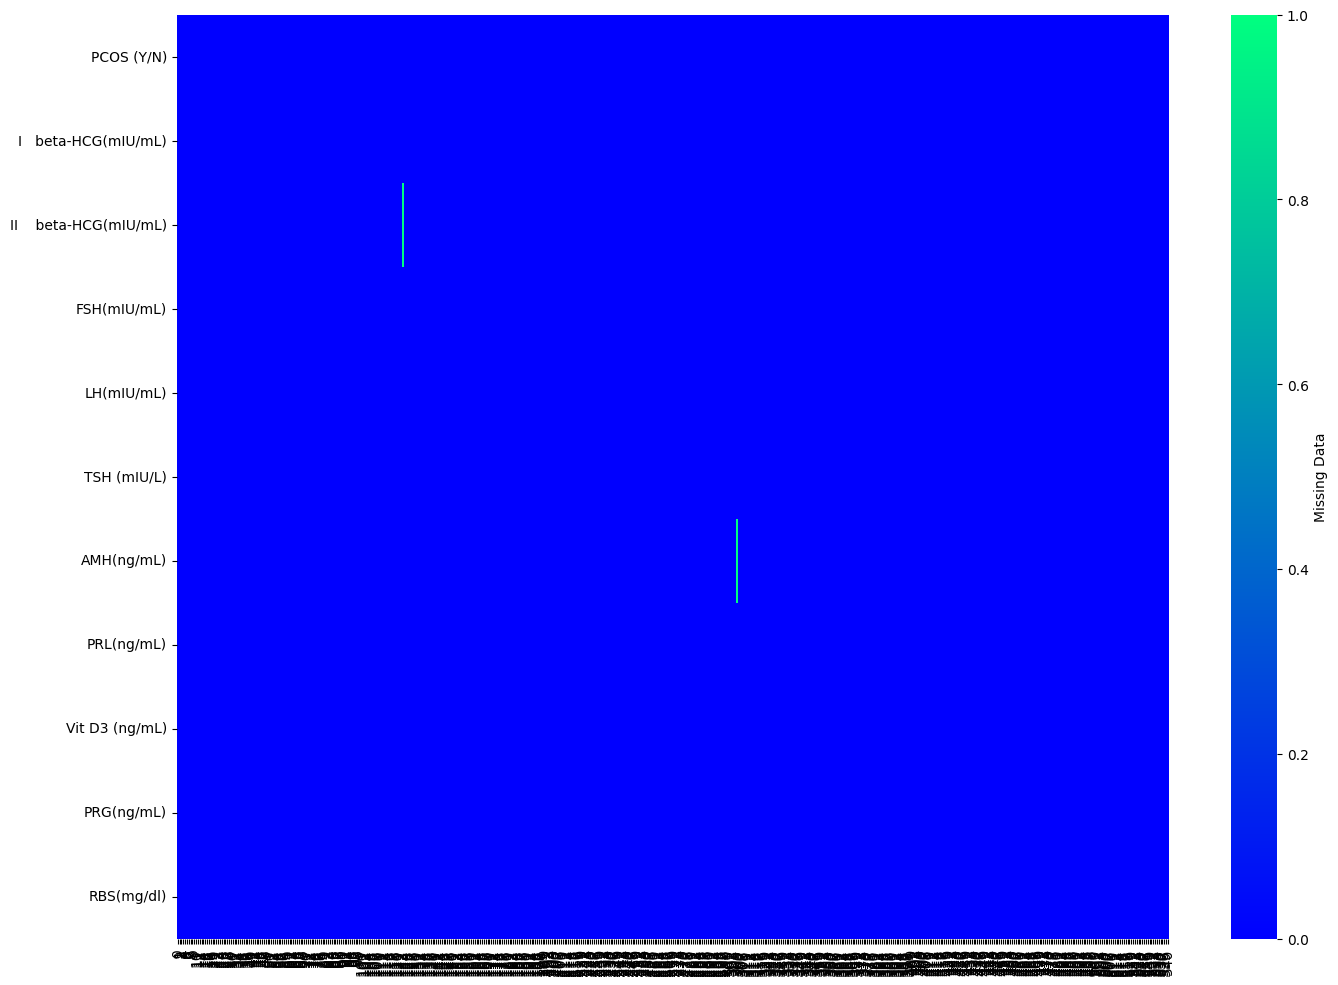

In [9]:
#plotting heatmap to visualize missing values
plt.figure(figsize=(16,12))
sns.heatmap(df.isna().transpose(),
            cmap="winter",
            cbar_kws={'label': 'Missing Data'}, xticklabels=True, yticklabels=True)

In [10]:
#column names with missing data
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

In [11]:
#filling missing values with their median
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median()) #filling columns with missing value with their median

In [12]:
#Verifying if any missing values are left
df.columns[df.isna().any()].tolist() #no more missing values left

[]

**Visualization**

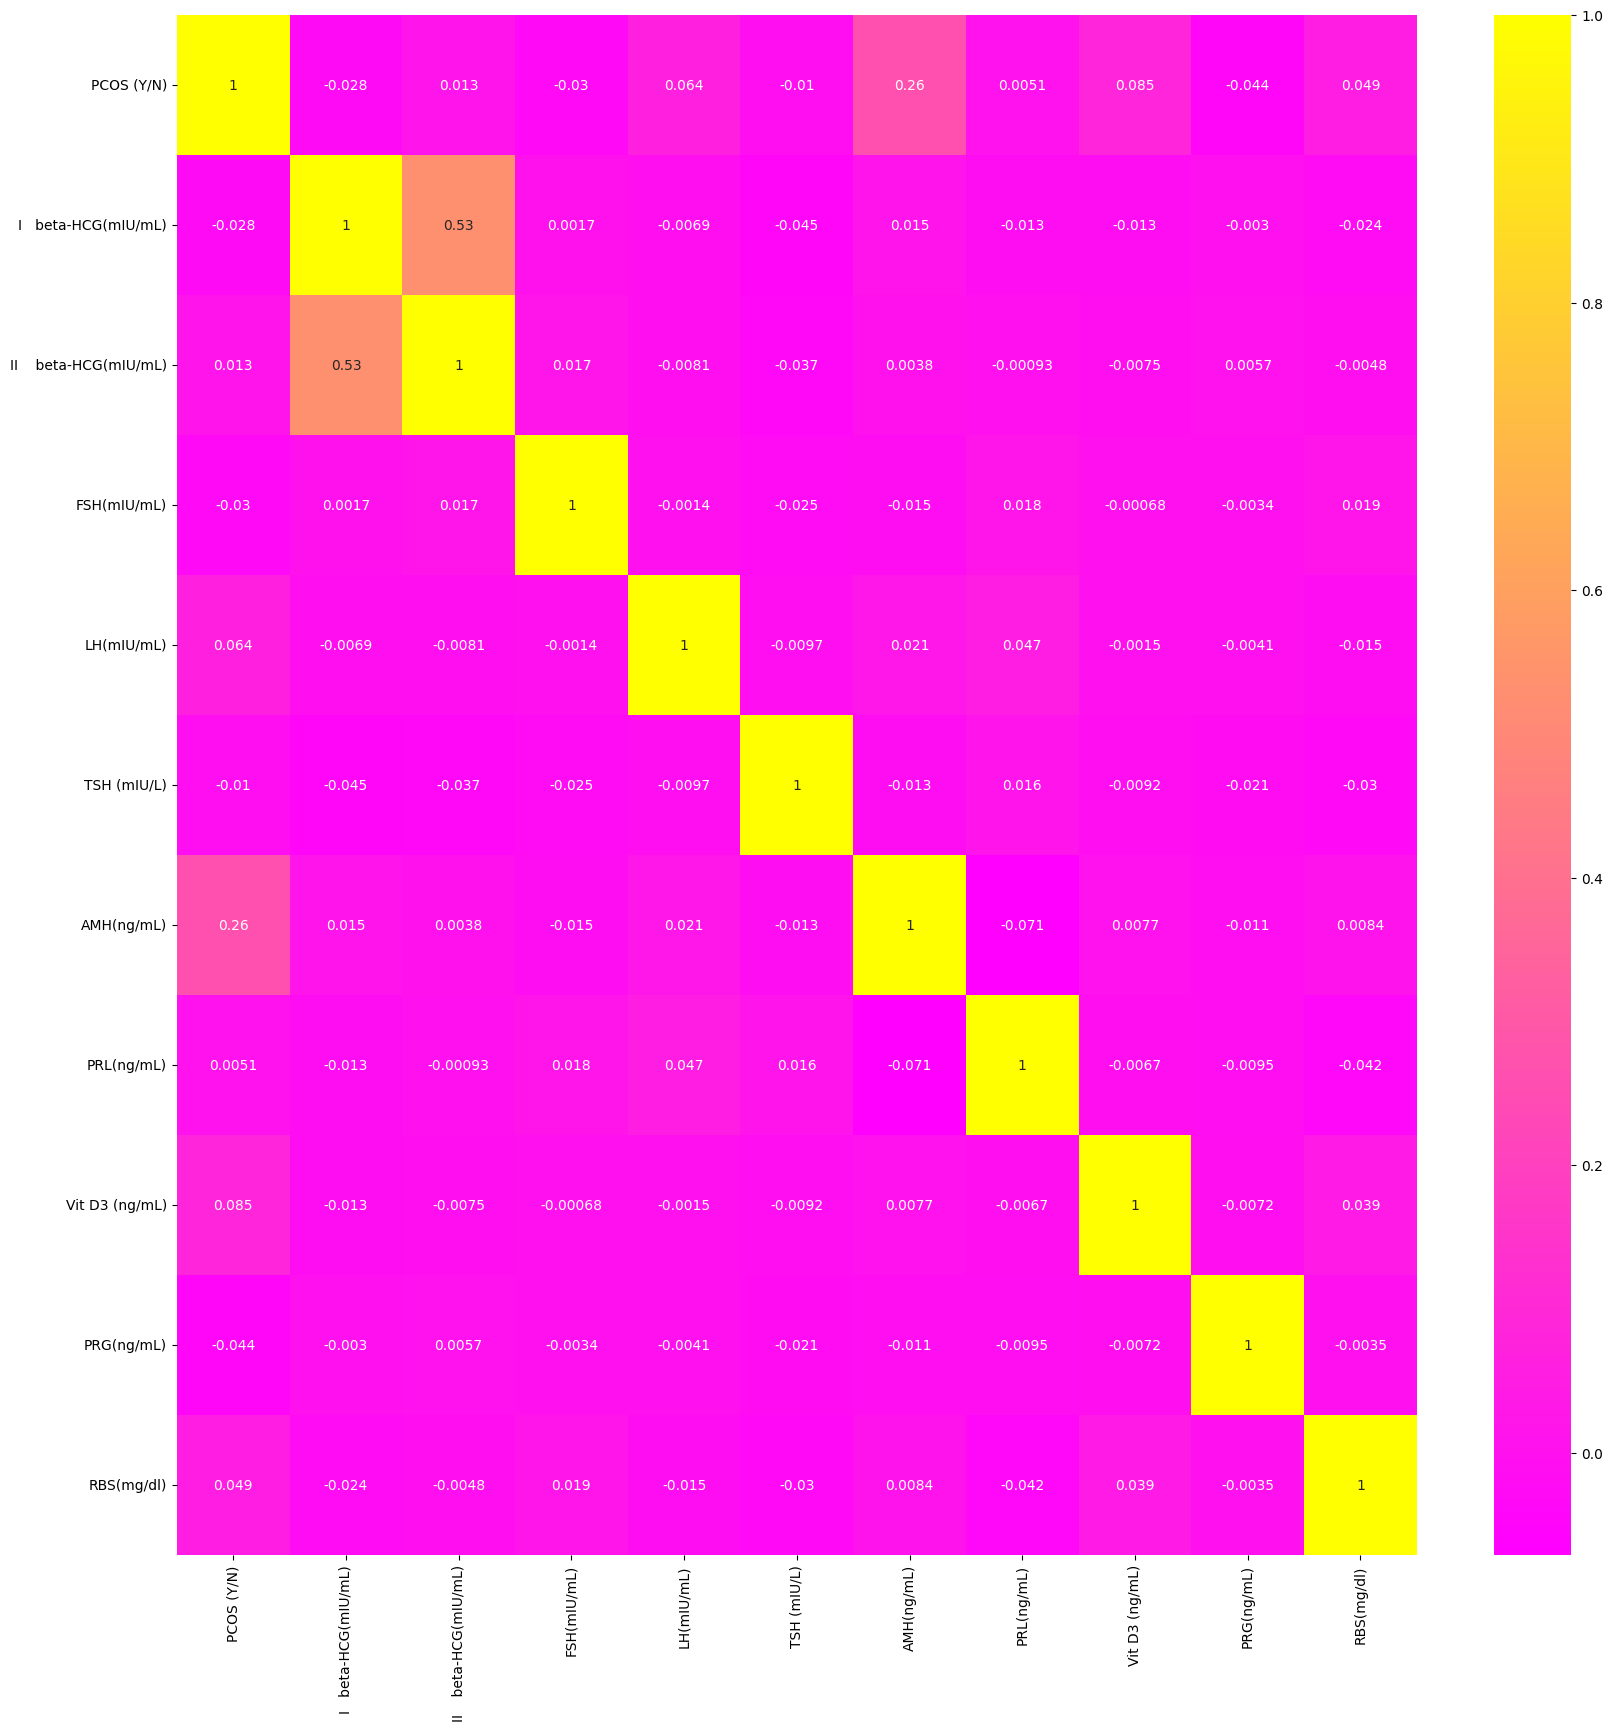

In [13]:
#Plotting correlation heatmap
plt.figure(figsize=(20, 20))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="spring", annot=True)

# displaying heatmap
plt.show()

In [14]:
#Checking how different features are correlated to PCOS
df.corr()["PCOS (Y/N)"].sort_values(ascending=False) #sorting in descending order


PCOS (Y/N)                1.000000
AMH(ng/mL)                0.264141
Vit D3 (ng/mL)            0.085494
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
II    beta-HCG(mIU/mL)    0.012760
PRL(ng/mL)                0.005143
TSH (mIU/L)              -0.010140
I   beta-HCG(mIU/mL)     -0.027617
FSH(mIU/mL)              -0.030319
PRG(ng/mL)               -0.043834
Name: PCOS (Y/N), dtype: float64

PCOS is correlated to Follicle Number, Cycle(R/I)



In [15]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [16]:
categorical_variables

['PCOS (Y/N)']

In [17]:
numerical_variables

['I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)']

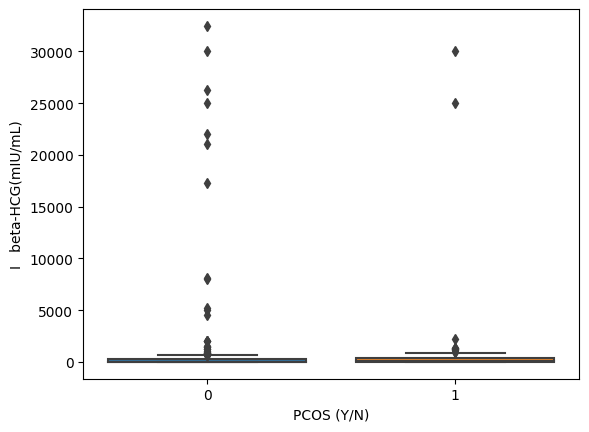

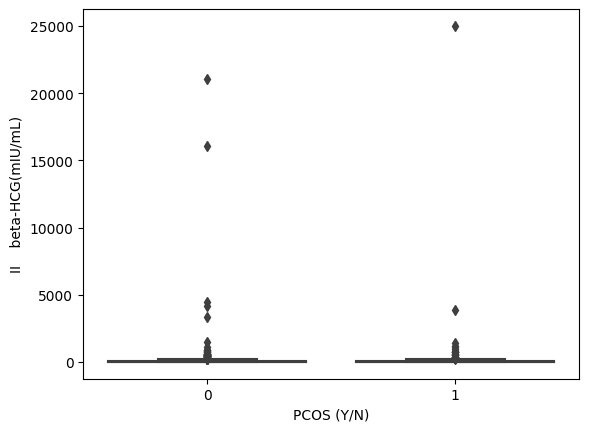

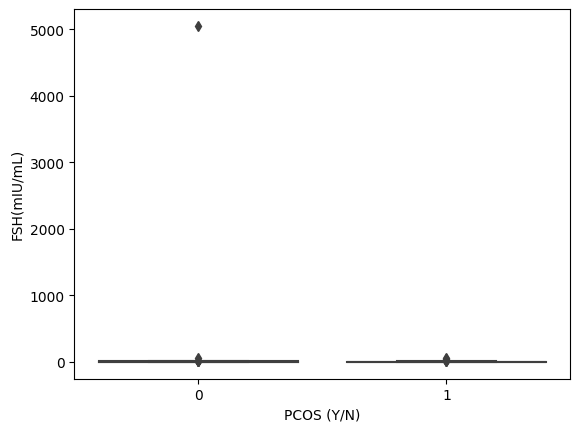

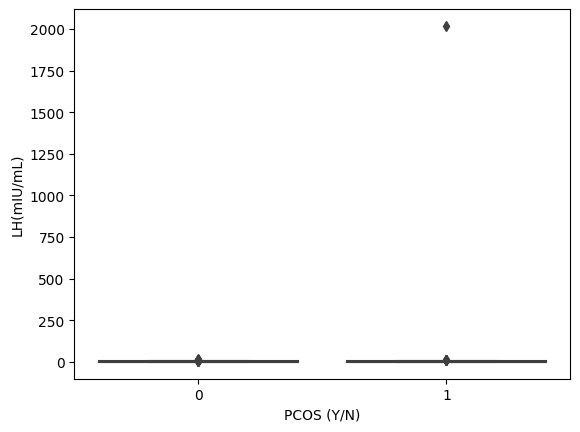

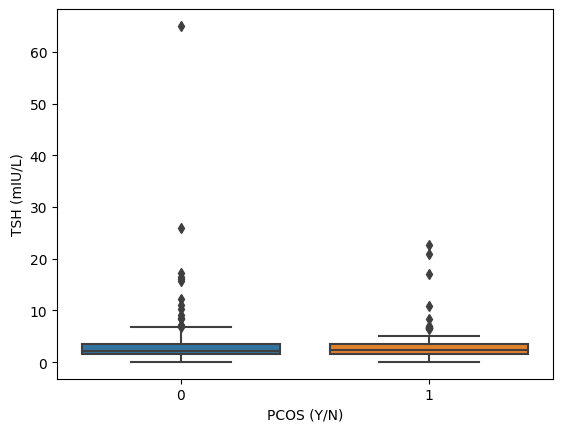

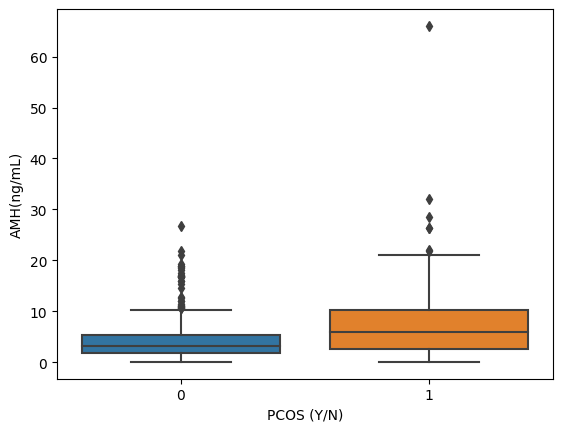

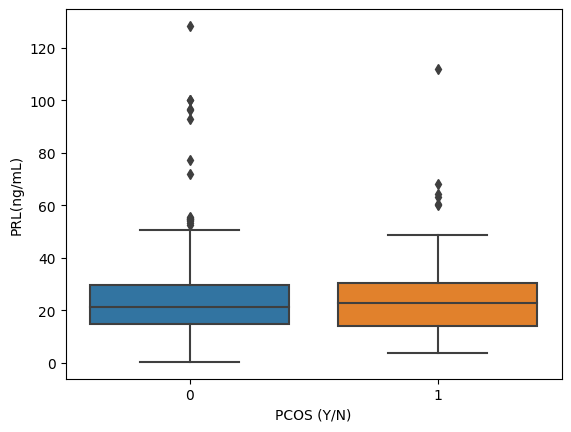

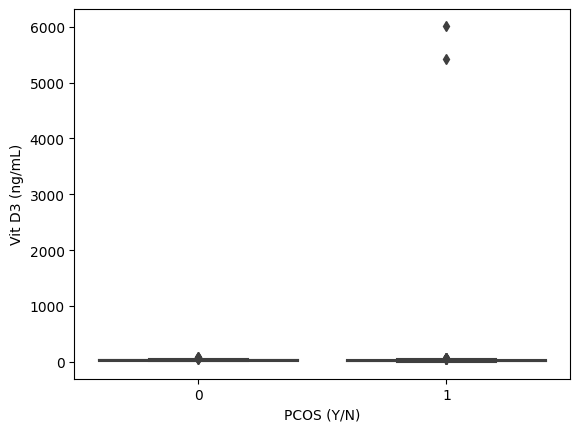

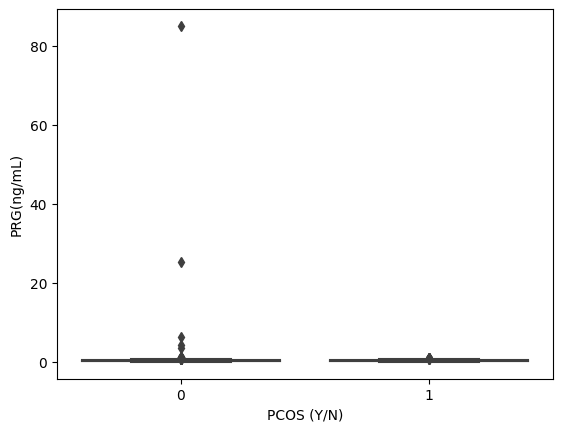

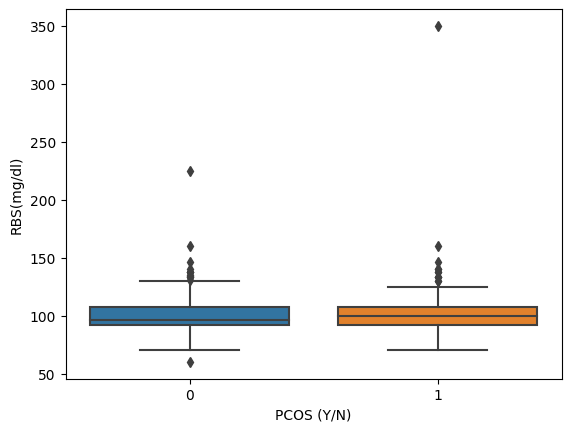

In [18]:
#Plotting Box plot for the numerical variables
for y in numerical_variables:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=df)
    plt.show()

Observations from boxplot
* higher the follicle number more the tendancy of PCOS
* patients with lower cycle lengths means more tendancy of PCOS
* the average age of patients diagnosed with PCOS is 30 years

In [19]:
#Plotting barplot for categorical variables
for x in categorical_variables:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS (Y/N)", data = df)
        plt.show()

Observations from barplot-

**weight gain, hair growth, pipmles, hair loss, fast food and skin darkening means higher chances of PCOS**.

So the above can also be termed as symptoms of PCOS

<Axes: xlabel='PCOS (Y/N)', ylabel='count'>

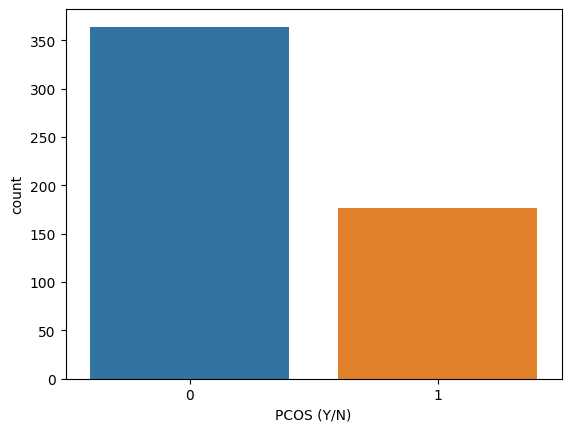

In [20]:
sns.countplot(x = "PCOS (Y/N)", data = df)


In [21]:
df["PCOS (Y/N)"].value_counts()


0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [22]:
177/(364 + 177)*100


32.71719038817005

**32 %** of patients in our dataset are those having PCOS syndrome



**Classification using Linear Regression**

In [23]:
df

,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl)
0,0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.0
1,0,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.0
2,1,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.0
3,0,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.0
4,0,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.0
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,108.0
538,0,1.99,1.99,11.96,2.78,2.87,3.70,96.41,22.5,0.25,92.0
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,115.0


In [24]:
df.columns = ['PCOS', 'betaHCG', 'betaHCG_', 'FSH', 'LH', 'TSH', 'AMH', 'PRL', 'VitD3', 'PRG', 'RBS']
df

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.0
1,0,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.0
2,1,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.0
3,0,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.0
4,0,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.0
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,108.0
538,0,1.99,1.99,11.96,2.78,2.87,3.70,96.41,22.5,0.25,92.0
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,115.0


In [25]:
y = df.iloc[:, 0]


In [26]:
X = df.iloc[:, 1:]


**CLASSIFICATION USING LINEAR MODELS**

In [27]:
#CLASSIFICATION USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
LogisticRegression = logreg.fit(X_train, y_train)
#LR_y_pred = LogisticRegression.predict(X_test)
LR_y_pred = LogisticRegression.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, LR_y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y, LR_y_pred))

Accuracy of logistic regression classifier on test set: 0.70

The confusion Matrix is : 
 [[342  22]
 [141  36]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.71      0.94      0.81       364
           1       0.62      0.20      0.31       177

    accuracy                           0.70       541
   macro avg       0.66      0.57      0.56       541
weighted avg       0.68      0.70      0.64       541



In [28]:
LR_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [29]:
#CLASSIFICATION USING SVM
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = svm.SVC()
SVM = clf.fit(X_train, y_train)

SVM_y_pred = SVM.predict(X)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X, y)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, SVM_y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y, SVM_y_pred))

Accuracy of SVM classifier on test set: 0.68

The confusion Matrix is : 
 [[364   0]
 [175   2]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81       364
           1       1.00      0.01      0.02       177

    accuracy                           0.68       541
   macro avg       0.84      0.51      0.41       541
weighted avg       0.78      0.68      0.55       541



In [30]:
SVM_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**CLASSIFICATION USING NON LINEAR MODELS**

In [31]:
#CLASSIFICATION USING NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = GaussianNB()
NB = clf.fit(X_train, y_train)

NB_y_pred = NB.predict(X)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf.score(X, y)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, NB_y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y, NB_y_pred))

Accuracy of Naive Bayes classifier on test set: 0.69

The confusion Matrix is : 
 [[341  23]
 [147  30]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.70      0.94      0.80       364
           1       0.57      0.17      0.26       177

    accuracy                           0.69       541
   macro avg       0.63      0.55      0.53       541
weighted avg       0.66      0.69      0.62       541



In [32]:
NB_y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
#CLASSIFICATION USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier()
RF = clf.fit(X_train, y_train)

RF_y_pred = RF.predict(X)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X, y)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, RF_y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y, RF_y_pred))

Accuracy of Random Forest classifier on test set: 0.90

The confusion Matrix is : 
 [[346  18]
 [ 37 140]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       364
           1       0.89      0.79      0.84       177

    accuracy                           0.90       541
   macro avg       0.89      0.87      0.88       541
weighted avg       0.90      0.90      0.90       541



In [34]:
RF_y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [35]:
#CLASSIFICATION USING K-NEAREST NEIGHBOR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
KNN = knn.fit(X_train, y_train)
KNN_y_pred = KNN.predict(X)

accuracy = accuracy_score(y, KNN_y_pred)
print('Accuracy of K-nearest Neighbor classifier on test set:', accuracy)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, KNN_y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y, KNN_y_pred))

Accuracy of K-nearest Neighbor classifier on test set: 0.767097966728281

The confusion Matrix is : 
 [[323  41]
 [ 85  92]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       364
           1       0.69      0.52      0.59       177

    accuracy                           0.77       541
   macro avg       0.74      0.70      0.72       541
weighted avg       0.76      0.77      0.76       541



In [36]:
KNN_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [37]:
#CLASSIFICATION USING DECISION TREE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
DT = dt.fit(X_train, y_train)
DT_y_pred = DT.predict(X)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(X, y)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, DT_y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y, DT_y_pred))

Accuracy of Decision Tree classifier on test set: 0.89

The confusion Matrix is : 
 [[337  27]
 [ 32 145]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       364
           1       0.84      0.82      0.83       177

    accuracy                           0.89       541
   macro avg       0.88      0.87      0.88       541
weighted avg       0.89      0.89      0.89       541



In [38]:
DT_y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,

In [39]:
#CLASSIFICATION USING XGBOOST
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X, label=y)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}

# Train the XGBoost model
num_rounds = 10
XGBOOST = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
XB_y_pred = XGBOOST.predict(dtest)

# Convert the predictions to integers
XB_y_pred = XB_y_pred.astype(int)

# Evaluate the model
accuracy = accuracy_score(y, XB_y_pred)
print('Accuracy of XGBoost classifier on test set:', accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, XB_y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y, XB_y_pred))

Accuracy of XGBoost classifier on test set: 0.7430683918669131

The confusion Matrix is : 
 [[324  40]
 [ 99  78]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       364
           1       0.66      0.44      0.53       177

    accuracy                           0.74       541
   macro avg       0.71      0.67      0.68       541
weighted avg       0.73      0.74      0.73       541



In [40]:
XB_y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,

#直接改变RBS的数据

In [41]:
data = pd.read_csv("/content/drive/MyDrive/Colab/causal_inference-medical/PCOS_processed.csv")
data

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.0
1,0,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.0
2,1,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.0
3,0,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.0
4,0,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.0
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,108.0
538,0,1.99,1.99,11.96,2.78,2.87,3.70,96.41,22.5,0.25,92.0
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,115.0


In [42]:
# 列名
column_name = 'RBS'

# 将列中大于100的值缩小到0.787倍，其他的不变
data[column_name] = df.apply(lambda row: row[column_name] * 0.787 if row[column_name] > 100 else row[column_name], axis=1)

In [43]:
data_noCausal = data.drop(['PCOS'], axis = 1)
data_noCausal

,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.000
1,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.000
2,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.000
3,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.000
4,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.000
...,...,...,...,...,...,...,...,...,...,...
536,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.000
537,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,84.996
538,1.99,1.99,11.96,2.78,2.87,3.70,96.41,22.5,0.25,92.000
539,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,90.505


In [44]:
#CLASSIFICATION USING LOGISTIC REGRESSION

LR_y_pred_pro_noCausal = LogisticRegression.predict(data_noCausal)
LR_y_pred_pro_noCausal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [45]:
#CLASSIFICATION USING SVM

SVM_y_pred_pro_noCausal = SVM.predict(data_noCausal)
SVM_y_pred_pro_noCausal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
#CLASSIFICATION USING NAIVE BAYES

NB_y_pred_pro_noCausal = NB.predict(data_noCausal)
NB_y_pred_pro_noCausal

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
#CLASSIFICATION USING RANDOM FOREST

RF_y_pred_pro_noCausal = RF.predict(data_noCausal)
RF_y_pred_pro_noCausal

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [48]:
#CLASSIFICATION USING K-NEAREST NEIGHBOR

KNN_y_pred_pro_noCausal = KNN.predict(data_noCausal)
KNN_y_pred_pro_noCausal

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [49]:
#CLASSIFICATION USING DECISION TREE

DT_y_pred_pro_noCausal = DT.predict(data_noCausal)
DT_y_pred_pro_noCausal

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,

In [50]:
#CLASSIFICATION USING XGBOOST
data_noCausal = xgb.DMatrix(data_noCausal)
XB_y_pred_pro_noCausal = XGBOOST.predict(data_noCausal)
XB_y_pred_pro_noCausal

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1.

#因果推断改变后的数据

In [51]:
%%capture
!pip3 install pyro-ppl

In [52]:
import os
import pickle
from tqdm import tqdm
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyro
import pyro.distributions as dist
from torch import nn
import seaborn as sns
from pyro.nn import PyroModule
from sklearn.model_selection import train_test_split

In [53]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab/causal_inference-medical/PCOS_processed.csv")
data_df

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.0
1,0,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.0
2,1,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.0
3,0,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.0
4,0,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.0
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,108.0
538,0,1.99,1.99,11.96,2.78,2.87,3.70,96.41,22.5,0.25,92.0
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,115.0


In [54]:
#把RBS小于100mg/dl的数据选出来存起来
filtered_data = data_df[data_df['RBS'] < 100]

In [55]:
#把RBS超过100mg/dl的数据选出来，作为治疗干预对象
data_df = data_df[data_df['RBS'] >= 100]

In [56]:
# split the dataset 80/20 into a train/test set, preserving label balance
#train_set, test_set = train_test_split(data_df, test_size=0.2, random_state=42)

In [57]:
# for CI testing
# smoke_test = ('CI' in os.environ)
pyro.enable_validation(True)
pyro.set_rng_seed(1)
pyro.enable_validation(True)

# setup
assert issubclass(PyroModule[nn.Linear], nn.Linear)
assert issubclass(PyroModule[nn.Linear], PyroModule)

##Create model

In [68]:
def PCOSModel(AMH, RBS, LH=None, FSH=None):
    distributions = {
        'Standard Normal': dist.Normal(torch.tensor(0.), torch.tensor(1.)),
    }

    #M_LH= pyro.sample("M_LH", distributions['Standard Normal'])

    LH0 = pyro.sample("LH0", distributions['Standard Normal'])


    FSH0 = pyro.sample("FSH0", distributions['Standard Normal'])


    LH = LH0 - 0.005 * RBS + 0.104 * AMH
    FSH = FSH0 - 0.114 * RBS - 1.288 * AMH

    data = data_df.copy()
    data = torch.tensor(data.values, dtype=torch.float32)
    with pyro.plate("data"):
      LH = pyro.sample("LH", dist.Normal(LH, 1), obs=LH)
      FSH = pyro.sample("FSH", dist.Normal(FSH, 1), obs=FSH)
      return  LH, FSH

In [69]:
data_tensor = torch.tensor(data_df.values, dtype=torch.float32)

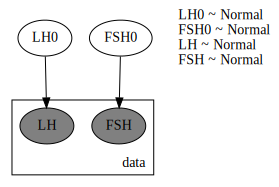

In [71]:
model_graph = pyro.render_model(PCOSModel, model_args=(data_tensor[:, 6], data_tensor[:, 10], data_tensor[:, 4], data_tensor[:, 3]), render_distributions=True, render_params=True)
model_graph

In [72]:
# 在使用Metmorphin 3个月后，RBS改变为0.787倍，新数据为M_RBS
data = data_df
data['M_RBS'] = data['RBS'] * 0.787
M_data = data
M_data

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS,M_RBS
8,0,1.99,1.99,3.76,3.02,1.51,1.00,19.00,21.80,0.30,116.0,91.292
9,0,1.99,1.99,2.80,1.51,6.65,1.61,11.74,27.70,0.25,125.0,98.375
10,0,158.51,158.51,4.89,2.02,1.56,4.47,13.47,18.10,0.36,108.0,84.996
11,0,1.99,1.99,4.09,1.47,3.98,1.67,21.10,29.18,0.25,100.0,78.700
12,1,1214.23,1214.23,2.00,1.51,6.51,7.94,22.43,31.40,0.30,125.0,98.375
...,...,...,...,...,...,...,...,...,...,...,...,...
530,0,270.49,1.99,9.29,2.54,1.31,1.00,19.31,30.50,0.26,100.0,78.700
533,1,572.86,5.81,3.71,4.66,1.40,19.60,29.57,32.10,0.36,100.0,78.700
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.00,0.25,108.0,84.996
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.40,0.25,115.0,90.505


In [73]:
M_data_tensor = torch.tensor(M_data.values, dtype=torch.float32)

###infer LH

In [74]:
LH = []
for i in tqdm(range(M_data_tensor.shape[0])):
  conditioned = pyro.condition(PCOSModel, data={"LH": M_data_tensor[i, 4], "FSH": M_data_tensor[i, 3]})
  posterior = pyro.infer.Importance(conditioned, num_samples=10)
  marginal = pyro.infer.EmpiricalMarginal(posterior.run(RBS=M_data_tensor[:, 11], AMH=M_data_tensor[:, 6]), sites="LH")
  LH.append(marginal.mean)

with open('/content/drive/MyDrive/Colab/causal_inference-medical/inferred_LH.pkl', 'wb') as f:
  pickle.dump(LH, f)


100%|██████████| 271/271 [00:09<00:00, 27.59it/s]


In [75]:
LH

[tensor(3.0200),
 tensor(1.5100),
 tensor(2.0200),
 tensor(1.4700),
 tensor(1.5100),
 tensor(3.7100),
 tensor(2.5100),
 tensor(2.9600),
 tensor(1.0500),
 tensor(0.8100),
 tensor(2.3000),
 tensor(0.8900),
 tensor(2.7800),
 tensor(1.0600),
 tensor(1.1900),
 tensor(0.4200),
 tensor(1.9900),
 tensor(4.8900),
 tensor(1.9700),
 tensor(0.7900),
 tensor(0.2700),
 tensor(2.4000),
 tensor(4.0900),
 tensor(6.0800),
 tensor(2.4200),
 tensor(0.1500),
 tensor(7.4700),
 tensor(1.5000),
 tensor(2.3500),
 tensor(8.4500),
 tensor(0.7700),
 tensor(2.8300),
 tensor(2.6000),
 tensor(3.2400),
 tensor(0.4100),
 tensor(1.9400),
 tensor(2.1900),
 tensor(0.0200),
 tensor(1.4400),
 tensor(1.2000),
 tensor(3.6500),
 tensor(1.5600),
 tensor(2.6900),
 tensor(2.7900),
 tensor(1.),
 tensor(2.4300),
 tensor(2.0800),
 tensor(3.9500),
 tensor(0.3000),
 tensor(0.3000),
 tensor(4.7500),
 tensor(0.3300),
 tensor(6.0300),
 tensor(1.9700),
 tensor(5.1100),
 tensor(2.1800),
 tensor(3.3700),
 tensor(1.9200),
 tensor(0.4200),
 

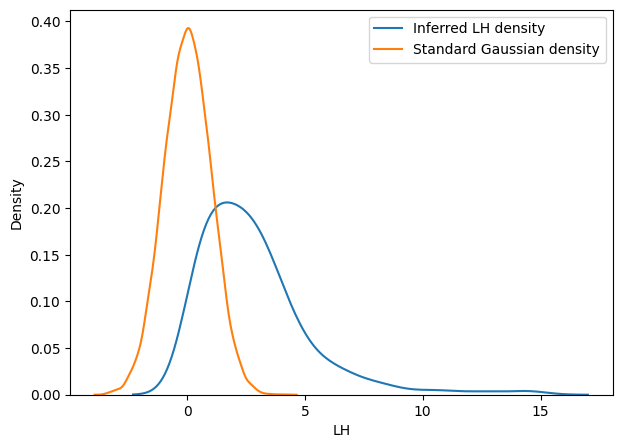

In [76]:
# plt.hist(M_LH)
plt.figure(figsize=(7, 5))
sns.kdeplot(np.array(LH), label="Inferred LH density")
sns.kdeplot(np.random.randn(10000), label="Standard Gaussian density")
plt.xlabel("LH")
plt.legend()
plt.show()

### infer FSH

In [77]:
FSH = []
for i in tqdm(range(M_data_tensor.shape[0])):
  conditioned = pyro.condition(PCOSModel, data={"LH": M_data_tensor[i, 4], "FSH": M_data_tensor[i, 3]})
  posterior = pyro.infer.Importance(conditioned, num_samples=10)
  marginal = pyro.infer.EmpiricalMarginal(posterior.run(RBS=M_data_tensor[:, 11], AMH=M_data_tensor[:, 6]), sites="FSH")
  FSH.append(marginal.mean)

with open('/content/drive/MyDrive/Colab/causal_inference-medical/inferred_FSH.pkl', 'wb') as f:
  pickle.dump(FSH, f)

100%|██████████| 271/271 [00:14<00:00, 18.15it/s]


In [78]:
FSH

[tensor(3.7600),
 tensor(2.8000),
 tensor(4.8900),
 tensor(4.0900),
 tensor(2.),
 tensor(7.4500),
 tensor(9.5100),
 tensor(4.8600),
 tensor(6.0500),
 tensor(1.8900),
 tensor(4.0800),
 tensor(5.3400),
 tensor(6.1800),
 tensor(4.6000),
 tensor(2.4100),
 tensor(2.8000),
 tensor(3.9900),
 tensor(7.8700),
 tensor(2.7900),
 tensor(3.2600),
 tensor(5.8100),
 tensor(2.2600),
 tensor(7.0800),
 tensor(9.4300),
 tensor(8.4900),
 tensor(1.4600),
 tensor(5.7500),
 tensor(4.7600),
 tensor(9.6600),
 tensor(5.4100),
 tensor(1.5700),
 tensor(6.7200),
 tensor(5.0100),
 tensor(6.2400),
 tensor(3.3900),
 tensor(6.3600),
 tensor(6.5400),
 tensor(1.),
 tensor(5.7100),
 tensor(4.2400),
 tensor(4.2100),
 tensor(3.2500),
 tensor(4.3600),
 tensor(5.3200),
 tensor(2.),
 tensor(4.6600),
 tensor(3.6800),
 tensor(5.2800),
 tensor(1.4800),
 tensor(1.4700),
 tensor(4.9600),
 tensor(2.6200),
 tensor(4.6200),
 tensor(4.8600),
 tensor(4.1300),
 tensor(6.2100),
 tensor(4.6100),
 tensor(4.5200),
 tensor(5.3600),
 tensor(9

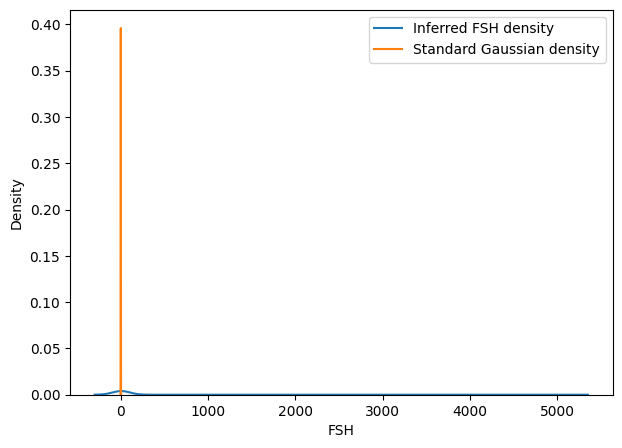

In [79]:
# plt.hist(M_FSH)
plt.figure(figsize=(7, 5))
sns.kdeplot(np.array(FSH), label="Inferred FSH density")
sns.kdeplot(np.random.randn(10000), label="Standard Gaussian density")
plt.xlabel("FSH")
plt.legend()
plt.show()

### 用新老数据重新ML预测(新：RBS, LH, FSH),（老：除了其他未改变的feature，再加上RBS小于100的原始数据）

In [89]:
M_data

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS,M_RBS
8,0,1.99,1.99,3.76,3.02,1.51,1.00,19.00,21.80,0.30,116.0,91.292
9,0,1.99,1.99,2.80,1.51,6.65,1.61,11.74,27.70,0.25,125.0,98.375
10,0,158.51,158.51,4.89,2.02,1.56,4.47,13.47,18.10,0.36,108.0,84.996
11,0,1.99,1.99,4.09,1.47,3.98,1.67,21.10,29.18,0.25,100.0,78.700
12,1,1214.23,1214.23,2.00,1.51,6.51,7.94,22.43,31.40,0.30,125.0,98.375
...,...,...,...,...,...,...,...,...,...,...,...,...
530,0,270.49,1.99,9.29,2.54,1.31,1.00,19.31,30.50,0.26,100.0,78.700
533,1,572.86,5.81,3.71,4.66,1.40,19.60,29.57,32.10,0.36,100.0,78.700
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.00,0.25,108.0,84.996
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.40,0.25,115.0,90.505


In [90]:
processed = M_data.drop(['RBS'], axis = 1)
processed = processed.rename(columns={'M_RBS': 'RBS'})
processed

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
8,0,1.99,1.99,3.76,3.02,1.51,1.00,19.00,21.80,0.30,91.292
9,0,1.99,1.99,2.80,1.51,6.65,1.61,11.74,27.70,0.25,98.375
10,0,158.51,158.51,4.89,2.02,1.56,4.47,13.47,18.10,0.36,84.996
11,0,1.99,1.99,4.09,1.47,3.98,1.67,21.10,29.18,0.25,78.700
12,1,1214.23,1214.23,2.00,1.51,6.51,7.94,22.43,31.40,0.30,98.375
...,...,...,...,...,...,...,...,...,...,...,...
530,0,270.49,1.99,9.29,2.54,1.31,1.00,19.31,30.50,0.26,78.700
533,1,572.86,5.81,3.71,4.66,1.40,19.60,29.57,32.10,0.36,78.700
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.00,0.25,84.996
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.40,0.25,90.505


In [91]:
filtered_data

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.0
1,0,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.0
2,1,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.0
3,0,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.0
4,0,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.0
...,...,...,...,...,...,...,...,...,...,...,...
532,0,667.07,1.99,10.29,5.10,1.48,6.30,32.14,23.4,0.25,92.0
534,0,615.29,1.99,3.74,9.38,1.69,18.20,33.87,26.9,0.30,92.0
535,0,1.99,1.99,7.06,3.50,17.20,7.60,39.01,32.7,0.25,92.0
536,0,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.0


In [92]:
processed = pd.concat([filtered_data, processed])

In [93]:
processed

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.000
1,0,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.000
2,1,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.000
3,0,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.000
4,0,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.000
...,...,...,...,...,...,...,...,...,...,...,...
530,0,270.49,1.99,9.29,2.54,1.31,1.00,19.31,30.5,0.26,78.700
533,1,572.86,5.81,3.71,4.66,1.40,19.60,29.57,32.1,0.36,78.700
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,84.996
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,90.505


In [94]:
processed = processed.sort_index()
processed

,PCOS,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.000
1,0,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.000
2,1,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.000
3,0,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.000
4,0,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.000
...,...,...,...,...,...,...,...,...,...,...,...
536,0,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.000
537,0,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,84.996
538,0,1.99,1.99,11.96,2.78,2.87,3.70,96.41,22.5,0.25,92.000
539,0,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,90.505


In [95]:
processed = processed.drop(['PCOS'], axis = 1)
processed

,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.000
1,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.000
2,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.000
3,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.000
4,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.000
...,...,...,...,...,...,...,...,...,...,...
536,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.000
537,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,84.996
538,1.99,1.99,11.96,2.78,2.87,3.70,96.41,22.5,0.25,92.000
539,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,90.505


In [96]:
X

,betaHCG,betaHCG_,FSH,LH,TSH,AMH,PRL,VitD3,PRG,RBS
0,1.99,1.99,7.95,3.68,0.68,2.07,45.16,17.1,0.57,92.0
1,60.80,1.99,6.73,1.09,3.16,1.53,20.09,61.3,0.97,92.0
2,494.08,494.08,5.54,0.88,2.54,6.63,10.52,49.7,0.36,84.0
3,1.99,1.99,8.06,2.36,16.41,1.22,36.90,33.4,0.36,76.0
4,801.45,801.45,3.98,0.90,3.57,2.26,30.09,43.8,0.38,84.0
...,...,...,...,...,...,...,...,...,...,...
536,1.99,1.99,10.06,1.81,1.11,1.70,5.30,36.6,0.25,92.0
537,80.13,1.99,5.07,2.84,2.05,5.60,21.09,23.0,0.25,108.0
538,1.99,1.99,11.96,2.78,2.87,3.70,96.41,22.5,0.25,92.0
539,292.92,1.99,4.40,4.33,2.50,5.20,38.89,22.4,0.25,115.0


##用处理后的数据去ML预测

In [97]:
#CLASSIFICATION USING LOGISTIC REGRESSION

LR_y_pred_pro = LogisticRegression.predict(processed)
LR_y_pred_pro

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,

In [98]:
#CLASSIFICATION USING SVM

SVM_y_pred_pro = SVM.predict(processed)
SVM_y_pred_pro

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
#CLASSIFICATION USING NAIVE BAYES

NB_y_pred_pro = NB.predict(processed)
NB_y_pred_pro

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
#CLASSIFICATION USING RANDOM FOREST

RF_y_pred_pro = RF.predict(processed)
RF_y_pred_pro

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [101]:
#CLASSIFICATION USING K-NEAREST NEIGHBOR

KNN_y_pred_pro = KNN.predict(processed)
KNN_y_pred_pro

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [102]:
#CLASSIFICATION USING DECISION TREE

DT_y_pred_pro = DT.predict(processed)
DT_y_pred_pro

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,

In [103]:
#CLASSIFICATION USING XGBOOST
processed = xgb.DMatrix(processed)
XB_y_pred_pro = XGBOOST.predict(processed)
XB_y_pred_pro

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1.

#计算评价结果

###药物干预（因果推断）后 - 药物干预前

In [104]:
result = LR_y_pred_pro - LR_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 524
结果为-1的元素个数: 0
结果为1的元素个数: 17


In [105]:
result = SVM_y_pred_pro - SVM_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 541
结果为-1的元素个数: 0
结果为1的元素个数: 0


In [106]:
result = NB_y_pred_pro - NB_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 533
结果为-1的元素个数: 6
结果为1的元素个数: 2


In [107]:
result = RF_y_pred_pro - RF_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 533
结果为-1的元素个数: 7
结果为1的元素个数: 1


In [108]:
result = KNN_y_pred_pro - KNN_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 481
结果为-1的元素个数: 37
结果为1的元素个数: 23


In [109]:
result = DT_y_pred_pro - DT_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 531
结果为-1的元素个数: 9
结果为1的元素个数: 1


In [110]:
result = XB_y_pred_pro - XB_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 539
结果为-1的元素个数: 0
结果为1的元素个数: 2


###药物干预（直接改变RBS）后 - 药物干预前

In [111]:
result = LR_y_pred_pro_noCausal - LR_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 534
结果为-1的元素个数: 0
结果为1的元素个数: 7


In [112]:
result = SVM_y_pred_pro_noCausal - SVM_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 541
结果为-1的元素个数: 0
结果为1的元素个数: 0


In [113]:
result = NB_y_pred_pro_noCausal - NB_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 534
结果为-1的元素个数: 6
结果为1的元素个数: 1


In [114]:
result = RF_y_pred_pro_noCausal - RF_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 537
结果为-1的元素个数: 3
结果为1的元素个数: 1


In [115]:
result = KNN_y_pred_pro_noCausal - KNN_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 500
结果为-1的元素个数: 22
结果为1的元素个数: 19


In [116]:
result = DT_y_pred_pro_noCausal - DT_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 536
结果为-1的元素个数: 4
结果为1的元素个数: 1


In [117]:
result = XB_y_pred_pro_noCausal - XB_y_pred

# 统计结果为0、-1和1的元素个数
count_0 = np.sum(result == 0)
count_minus_1 = np.sum(result == -1)
count_1 = np.sum(result == 1)

# 打印统计结果
print("结果为0的元素个数:", count_0)
print("结果为-1的元素个数:", count_minus_1)
print("结果为1的元素个数:", count_1)

结果为0的元素个数: 539
结果为-1的元素个数: 0
结果为1的元素个数: 2
